# What is the force on an artificial barrier?

I'm going to create two systems for comparison. First, the sawtooth system we've dicussed in the past: two sawtooth waves exactly out of phase with each other. The second is the same system, but with a barrier placed directly adjacent to the minimum on the apo surface.

There is no offset between the surfaces other than what is plotted. The catalytic rate is 312 per second, the substrate concentration is 1 M, and the intersurface prefactor is $3 \times 10^{6}$ per mole per second.

Here is how the surfaces look, with the barrier shown as a faint red line.

In [42]:
# Initialization
import sys, os
sys.path.insert(0, os.path.abspath('../../'))
from motors.simulation import Simulation
from motors.plot import *
from motors.models import *
prepare_plot()

import matplotlib as mpl
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [43]:
# Uperturbed system
this = Simulation(data_source = 'manual')
this.unbound = [saw(i, 50) for i in range(50)]
this.bound   = [saw(i + 25, 50) for i in range(50)]
this.C_intersurface = 10.0 ** 6  # per mole per second
this.offset_factor = 0  # kcal per mol
this.catalytic_rate = 312.0  # per second
this.cSubstrate = 10**0
this.simulate(user_energies=True)

In [44]:
# Blocked system
blocked = Simulation(data_source = 'manual')
blocked.unbound = [saw(i, 50) for i in range(50)]
blocked.bound   = [saw(i + 25, 50) for i in range(50)]
blocked.C_intersurface = 10.0 ** 6  # per mole per second
blocked.offset_factor = 0  # kcal per mol
blocked.catalytic_rate = 312.0  # per second
blocked.cSubstrate = 10**0

blocked.barrier = True
blocked.barrier_bin = 26

blocked.simulate(user_energies=True)

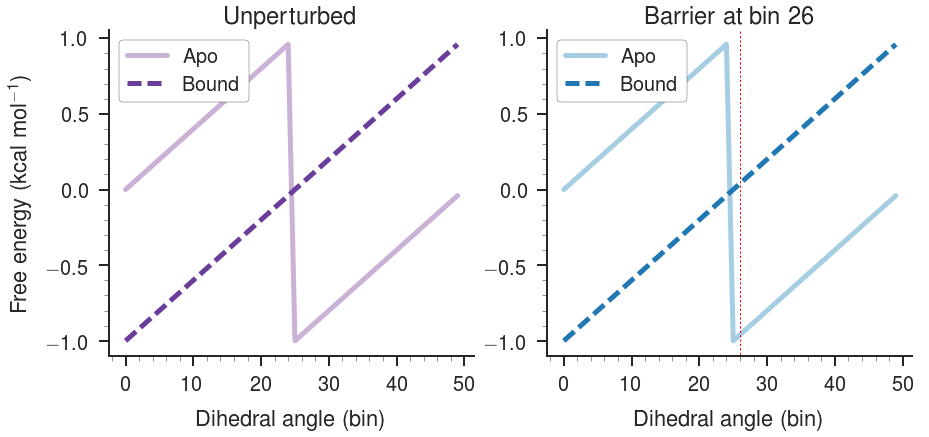

In [45]:
# Plot free energy surfaces
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.unbound, color=this.unbound_clr, label='Apo')
ax1.plot(this.bound, color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Free energy (kcal mol$^{-1}$)')
ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')

ax2 = plt.subplot(grid[0, 1])

ax2.plot(blocked.unbound, color=cmap[0], label='Apo')
ax2.plot(blocked.bound, color=cmap[1], ls='--', label='Bound')

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)

ax2.set_title('Barrier at bin 26')
paper_plot(fig)

The effect of the barrier is to zero the transition rate from bin 26 to bin 27 on both surfaces. (More properly, I suppose, the barrier should be at bin 26.5.)

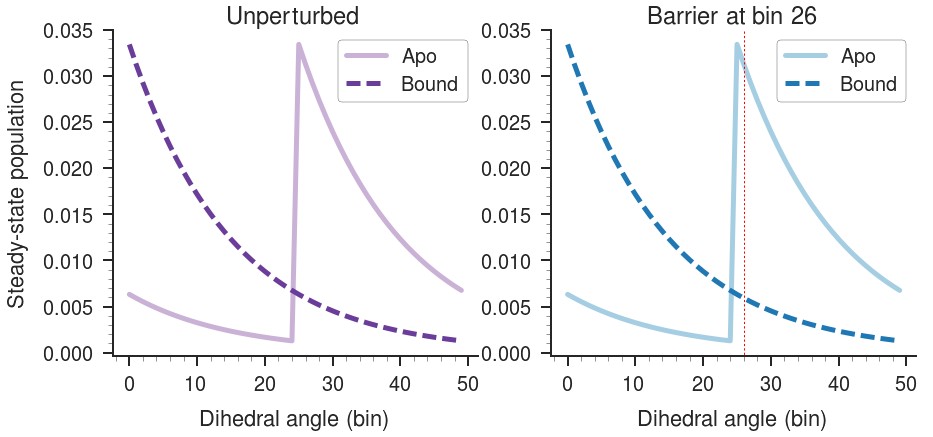

In [46]:
# Plot the steady-state populations
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.ss[0:this.bins], color=this.unbound_clr, label='Apo')
ax1.plot(this.ss[this.bins:2*this.bins], color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population')
ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')

ax2 = plt.subplot(grid[0, 1])

ax2.plot(blocked.ss[0:this.bins], color=cmap[0], label='Apo')
ax2.plot(blocked.ss[this.bins:2*this.bins], color=cmap[1], ls='--', label='Bound')

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

Moving the barrier doesn't seem to affect the steady-state population very much. The steady-state populations look very similiar regardless of where the barrier is -- and remarkably like the steady-state population in the absence of the barrier.

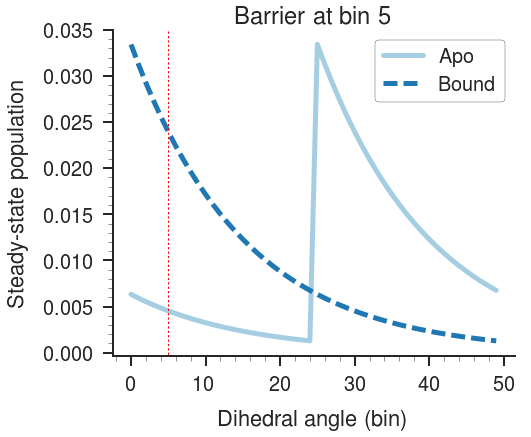

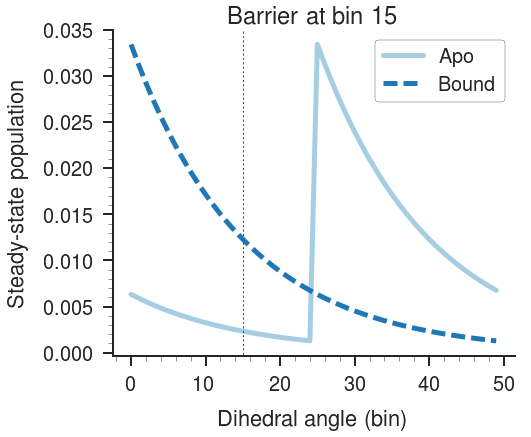

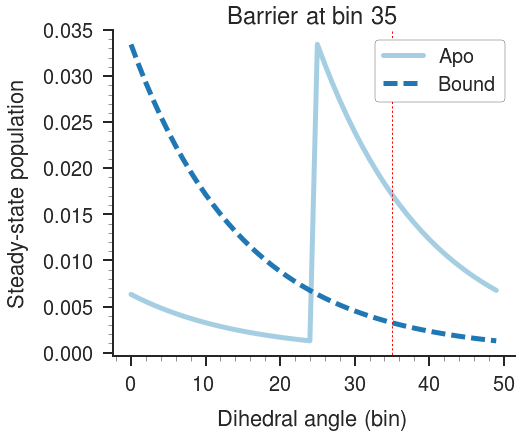

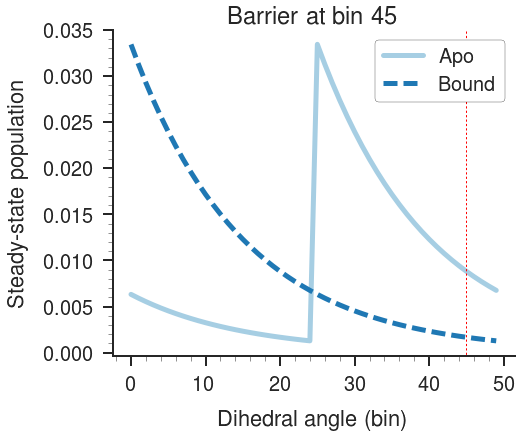

In [47]:
# Move the barrier...

for position in [5, 15, 35, 45]:

    move_the_barrier = Simulation(data_source = 'manual')
    move_the_barrier.unbound = [saw(i, 50) for i in range(50)]
    move_the_barrier.bound   = [saw(i + 25, 50) for i in range(50)]
    move_the_barrier.C_intersurface = 10.0 ** 6  # per mole per second
    move_the_barrier.offset_factor = 0  # kcal per mol
    move_the_barrier.catalytic_rate = 312.0  # per second
    move_the_barrier.cSubstrate = 10**0

    move_the_barrier.barrier = True
    move_the_barrier.barrier_bin = position

    move_the_barrier.simulate(user_energies=True)
    
    fig = plt.figure(figsize=(1 * 6 * 1.2, 6))
    grid = GridSpec(1, 1, wspace=0.2, hspace=0.2)
        
    ax2 = plt.subplot(grid[0, 0])

    ax2.plot(move_the_barrier.ss[0:this.bins], color=cmap[0], label='Apo')
    ax2.plot(move_the_barrier.ss[this.bins:2*this.bins], color=cmap[1], ls='--', label='Bound')
    ax2.set_xlabel('Dihedral angle (bin)')
    ax2.set_ylabel('Steady-state population')
    ax2.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
    ax2.axvline(position, -1, 1, c='r', ls=':', lw=1)
    ax2.set_title('Barrier at bin {}'.format(position))
    paper_plot(fig)

Let's go back to the comparison between the two systems. In the system without the barrier, the flux comes to about -39 cycles per second (even though the offset is very low, the substrate concentration is very high, and those two factors compensate for each other). The barrier nicely brings the net flux down to zero. And you can furthermore see that both surface individually have zero flux at the barrier. So it seems the barrier is doing the trick!

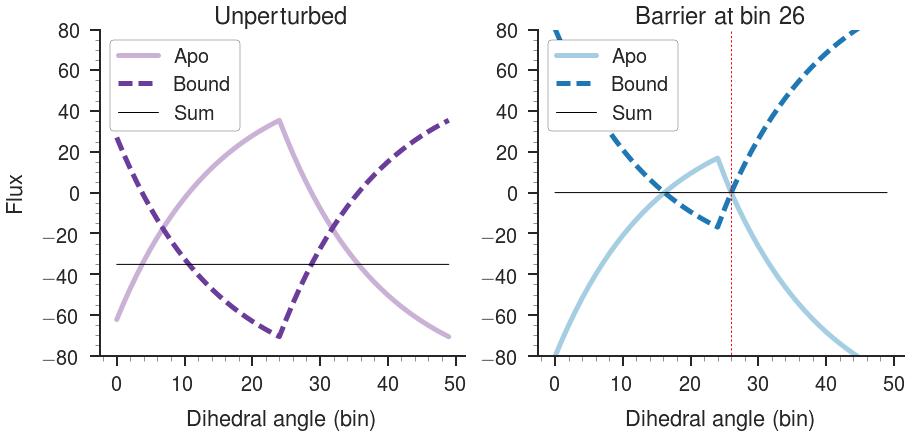

In [53]:
# Plot flux
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.flux_u, color=this.unbound_clr, label='Apo')
ax1.plot(this.flux_b, color=this.bound_clr, ls='--', label='Bound')
ax1.plot(this.flux_u + this.flux_b, color='k', lw=1, label='Sum')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Flux')
ax1.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')
ax1.set_ylim([-80, 80])

ax2 = plt.subplot(grid[0, 1])
ax2.plot(blocked.flux_u, color=cmap[0], label='Apo')
ax2.plot(blocked.flux_b, color=cmap[1], ls='--', label='Bound')
ax2.plot(blocked.flux_u + blocked.flux_b, color='k', lw=1, label='Sum')
ax2.set_ylim([-80, 80])


ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

But what is the population difference across the barrier?

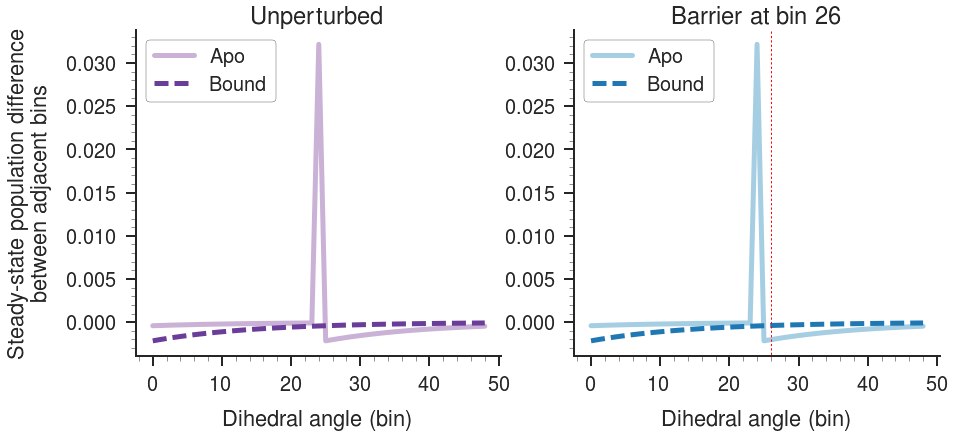

In [58]:
# Plot steady-state population differences
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(np.diff(this.ss[0:this.bins]), color=this.unbound_clr, label='Apo')
ax1.plot(np.diff(this.ss[this.bins:2*this.bins]), color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population difference\nbetween adjacent bins')
ax1.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')
#ax1.set_ylim([-80, 80])

ax2 = plt.subplot(grid[0, 1])
ax2.plot(np.diff(blocked.ss[0:blocked.bins]), color=cmap[0], label='Apo')
ax2.plot(np.diff(blocked.ss[blocked.bins:2*blocked.bins]), color=cmap[1], ls='--', label='Bound')
# ax2.set_ylim([-80, 80])

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

These plots are dominated by the population change caused by the energy drop.

In [65]:
print('Unperturbed system')
print('Apo')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, this.ss[bn]))
print('Bound')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, this.ss[this.bins + bn]))

print('Blocked system')
print('Apo')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, blocked.ss[bn]))
print('Bound')
for bn in range(24, 28):
    print('Bin {}\tPopulation {}'.format(bn, blocked.ss[blocked.bins + bn]))


Unperturbed system
Apo
Bin 24	Population 0.001275355786917833
Bin 25	Population 0.03344464757706401
Bin 26	Population 0.031287700969127225
Bin 27	Population 0.02926986248314926
Bound
Bin 24	Population 0.0067502519447762465
Bin 25	Population 0.006314909026189252
Bin 26	Population 0.0059076425436656085
Bin 27	Population 0.005526641772407907
Blocked system
Apo
Bin 24	Population 0.0012753616867562105
Bin 25	Population 0.033444803931732395
Bin 26	Population 0.03128784755439732
Bin 27	Population 0.029269893486221294
Bound
Bin 24	Population 0.006750225384363492
Bin 25	Population 0.006314883280555354
Bin 26	Population 0.005907617555371085
Bin 27	Population 0.0055266760166582584


In [67]:
from motors.analysis import summarize_power_and_load

In [68]:
summarize_power_and_load()

In [177]:
def summarize_power_and_load(debug=True, negative=True):
    
    this = Simulation(data_source = 'manual')
    this.unbound = [saw(i, 50) for i in range(50)]
    this.bound   = [saw(i + 25, 50) for i in range(50)]
    this.C_intersurface = 10.0 ** 6  # per mole per second
    this.offset_factor = 0  # kcal per mol
    this.catalytic_rate = 312.0  # per second
    this.cSubstrate = 10**0
    this.load = True
    slope = 0.000
    increment = 0.00000001
    
    
    loads, power_given_load, flux_given_load = [], [], []
    iteration = 0
    print('#\tLoad\tFlux\tPower\tMax power'.expandtabs(16))
    
    while True:
        if negative:
            this.load_slope = -slope
        else:
            this.load_slope = slope
        this.simulate(user_energies=True)

        flux = np.mean(this.flux_u + this.flux_b)
        power = this.load_slope * np.mean(this.flux_u + this.flux_b)
        
        loads.append(this.load_slope)
        flux_given_load.append(flux)
        power_given_load.append(power)
        max_power = max(power_given_load)
        max_power_index = power_given_load.index(max_power)
        print('{0}\t{1:2.7f}\t{2:+2.7f}\t{3:+2.7f}\t{4:2.7f}'.format(iteration,this.load_slope, flux, power, max_power).expandtabs(16))


        if negative:
            if flux > 0:
                min_flux = np.absolute(np.array(flux_given_load)).min()
                min_index = np.argmin(np.absolute(np.array(flux_given_load)))
                max_power = np.absolute(np.array(power_given_load)).max()
                max_index = np.argmax(np.absolute(np.array(power_given_load)))
                print('-'*80)
                print('Minimum flux = {0:+2.7f} cycle/second at '
                      'stall torque = {1:+2.7f} kcal/mol/cycle'.format(min_flux, loads[min_index]))
                print('Maximum power = {0:+2.7f} kcal/mol/second at '
                      'torque = {1:+2.7f} kcal/mol/cycle'.format(max_power, loads[max_index]))
                break
        else:
            if flux < 0:
                break
        
        if iteration % 100 == 0:
            increment *= 10
        if iteration > 1000:
            print('I give up.')
        slope += increment
        iteration += 1
    del this

In [178]:
summarize_power_and_load()

#               Load            Flux            Power           Max power
0               -0.0000000      -35.2218194     +0.0000000      0.0000000
1               -0.0000001      -33.5357266     +0.0000034      0.0000034
2               -0.0000002      -31.8492287     +0.0000064      0.0000064
3               -0.0000003      -30.1633760     +0.0000090      0.0000090
4               -0.0000004      -28.4775251     +0.0000114      0.0000114
5               -0.0000005      -26.7911832     +0.0000134      0.0000134
6               -0.0000006      -25.1050383     +0.0000151      0.0000151
7               -0.0000007      -23.4193358     +0.0000164      0.0000164
8               -0.0000008      -21.7333502     +0.0000174      0.0000174
9               -0.0000009      -20.0473587     +0.0000180      0.0000180
10              -0.0000010      -18.3613274     +0.0000184      0.0000184
11              -0.0000011      -16.6755662     +0.0000183      0.0000184
12              -0.0000012      -14.98